In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torch import nn
from sklearn.datasets import make_blobs
from helper_functions import plot_predictions, plot_decision_boundaries, accuracy_fn

device = "mps" if torch.mps.is_available() else "cpu"
print(f"Using device: {device}")

Using device: mps


In [3]:
# Generate synthetic data
NUM_SAMPLES = 1000
CENTERS = 5
STD = 0.5

X, y = make_blobs(n_samples=NUM_SAMPLES, n_features=2, centers=CENTERS, cluster_std=STD, random_state=42) # type: ignore

In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

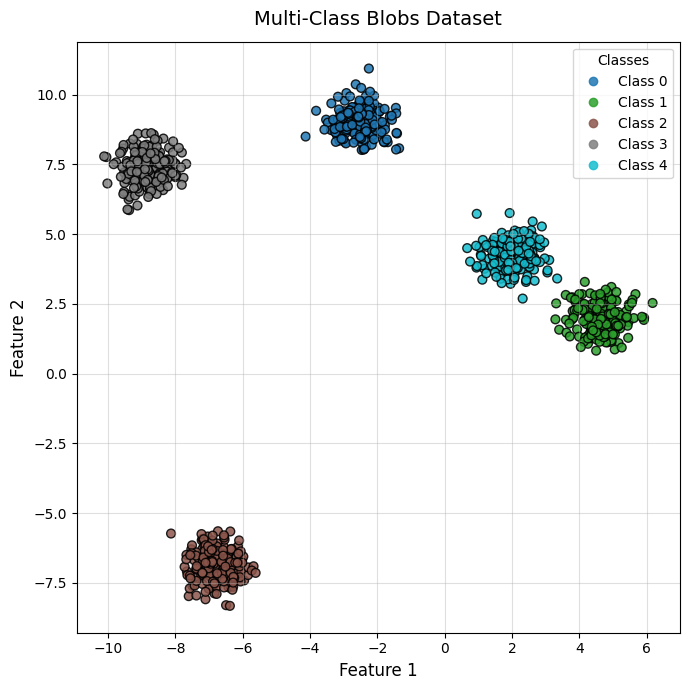

In [5]:
# Plot
plt.figure(figsize=(7, 7))

scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    cmap="tab10",
    s=40,
    edgecolor="k",
    alpha=0.85
)

plt.title("Multi-Class Blobs Dataset", fontsize=14, pad=12)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)

# Add color legend
handles, _ = scatter.legend_elements()
labels = [f"Class {i}" for i in np.unique(y)]
plt.legend(handles, labels, title="Classes", loc="best")

plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


In [6]:
blob_classification_model = nn.Sequential(
    nn.Linear(in_features=2, out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16, out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16, out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16, out_features=CENTERS),
).to(device=device)

In [7]:
# loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(blob_classification_model.parameters(), lr=0.01)

In [8]:
# numpy array to tensors and move tensors to device
X_train = torch.from_numpy(X_train).float().to(device)
X_test  = torch.from_numpy(X_test).float().to(device)

y_train = torch.from_numpy(y_train).long().to(device)
y_test  = torch.from_numpy(y_test).long().to(device)

In [9]:
# set the random seed
torch.manual_seed(42)

# set epochs
epochs = 1001

for epoch in range(epochs):
    # enter training mode
    blob_classification_model.train()

    # forward pass
    y_logits = blob_classification_model(X_train).squeeze()
    y_pred = y_logits.argmax(dim=1)

    # calculate loss and accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)

    # zero the gradients
    optimizer.zero_grad()

    # backpropagation
    loss.backward()

    # optimizer step in direction of steepest descent
    optimizer.step()

    # evaluate the model every ten epochs
    if epoch % 10 == 0:
        blob_classification_model.eval()
        with torch.inference_mode():
            test_logits = blob_classification_model(X_test)
            test_pred = test_logits.argmax(dim=1)

            test_loss = loss_fn(test_logits, y_test)
            test_acc = accuracy_fn(y_test, test_pred)

            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.61553, Acc: 18.12% | Test Loss: 1.60163, Test Acc: 17.00%
Epoch: 10 | Loss: 1.55069, Acc: 20.50% | Test Loss: 1.53876, Test Acc: 18.00%
Epoch: 20 | Loss: 1.49760, Acc: 20.50% | Test Loss: 1.48692, Test Acc: 18.00%
Epoch: 30 | Loss: 1.45039, Acc: 20.50% | Test Loss: 1.44029, Test Acc: 18.00%
Epoch: 40 | Loss: 1.40638, Acc: 20.50% | Test Loss: 1.39665, Test Acc: 18.00%
Epoch: 50 | Loss: 1.36445, Acc: 21.00% | Test Loss: 1.35450, Test Acc: 20.50%
Epoch: 60 | Loss: 1.32370, Acc: 39.50% | Test Loss: 1.31311, Test Acc: 41.50%
Epoch: 70 | Loss: 1.28401, Acc: 39.62% | Test Loss: 1.27244, Test Acc: 41.50%
Epoch: 80 | Loss: 1.24336, Acc: 46.50% | Test Loss: 1.23045, Test Acc: 49.00%
Epoch: 90 | Loss: 1.20051, Acc: 59.75% | Test Loss: 1.18623, Test Acc: 56.50%
Epoch: 100 | Loss: 1.15499, Acc: 64.12% | Test Loss: 1.13946, Test Acc: 65.50%
Epoch: 110 | Loss: 1.10754, Acc: 73.88% | Test Loss: 1.09101, Test Acc: 73.50%
Epoch: 120 | Loss: 1.05805, Acc: 87.62% | Test Loss: 1.04099, T

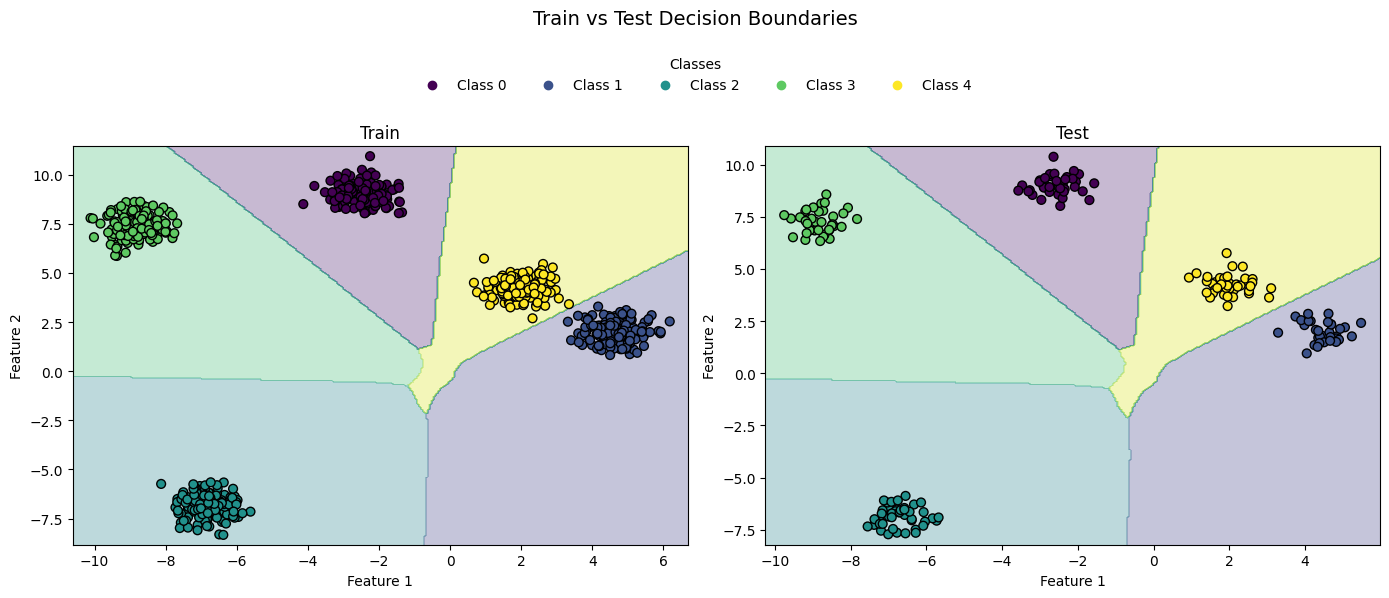

In [10]:
plot_decision_boundaries(blob_classification_model,
                         X_train, y_train,
                         X_test, y_test,
                         title="Train vs Test Decision Boundaries")